In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

In [2]:
L = 50 # oversampling factor
Tb = 0.5 # bit period in seconds
fs = L/Tb # sampling frequency in Hertz
fc = 2/Tb # carrier frequency
N = 8 # number of bits to transmit
h = 1 # modulation index

In [3]:
b = 2*np.random.randint(2, size=N)-1 # random information sequence in +1/-1 format
b = np.tile(b, (L,1)).flatten('F')
b_integrated = lfilter([1.0],[1.0,-1.0],b)/fs #Integrate b using filter

In [4]:
theta= np.pi*h/Tb*b_integrated
t=np.arange(0, Tb*N, 1/fs) # time base
s = np.cos(2*np.pi*fc*t + theta) # CPFSK signal

C:\Users\55619\AppData\Local\Temp\ipykernel_2832\1892781024.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


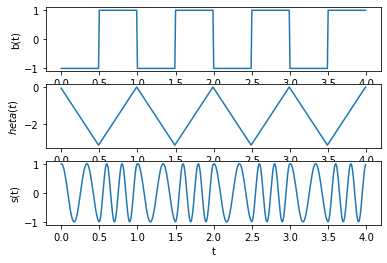

In [5]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 1)
ax1.plot(t,b);ax1.set_xlabel('t');ax1.set_ylabel('b(t)')
ax2.plot(t,theta);ax2.set_xlabel('t');ax2.set_ylabel('$\theta(t)$')
ax3.plot(t,s);ax3.set_xlabel('t');ax3.set_ylabel('s(t)')
fig.show()

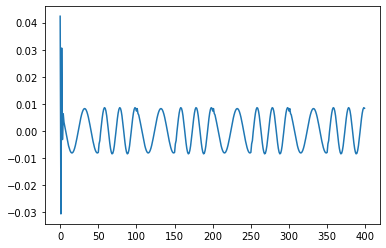

In [16]:
from scipy.signal import butter, lfilter
from scipy.signal import freqs

def butter_lowpass(cutOff, fs, order=5):
    nyq = 0.5 * fs
    normalCutoff = cutOff / nyq
    b, a = butter(order, normalCutoff, btype='low', analog = True)
    return b, a

def butter_lowpass_filter(data, cutOff, fs, order=4):
    b, a = butter_lowpass(cutOff, fs, order=order)
    y = lfilter(b, a, data)
    return y

cutOff = 50.1 #cutoff frequency in rad/s
fs = 188.495559 #sampling frequency in rad/s
order = 5 #order of filter

#print sticker_data.ps1_dxdt2

y = butter_lowpass_filter(s, cutOff, fs, order)
plt.plot(y)